# setup

Run this once before the plot’s code. The individual charts, however, may redefine its own aesthetics.

In [72]:
#install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings;warnings.filterwarnings('ignore')

In [73]:
arge = 22; med = 16; small = 12

params = {'axes.titlesize': large,    # 设置子图上的标题字体
            'legend.fontsize': med,     # 设置图例的字体
            'figure.figsize': (16, 10), # 设置图像的画布
           'axes.labelsize': med,      # 设置标签的字体
            'xtick.labelsize': med,     # 设置x轴上的标尺的字体
            'ytick.labelsize': med,     # 设置整个画布的标题字体
          'figure.titlesize': large}  
#plt.rcParams.update(params)           # 更新默认属性
plt.style.use('seaborn-whitegrid')    # 设定整体风格
sns.set_style("white")                # 设定整体背景风格
%matplotlib inline

# Version
print(mpl.__version__)
print(sns.__version__) 

3.4.2
0.11.1


## Corralation

The plots under correlation is used to visualize the relationship between 2 or more variables. That is, how does one variable change with respect to another.

### Scatter Plot

Scatteplot is a classic and fundamental plot used to study the relationship between two variables. If you have multiple groups in your data you may want to visualise each group in a different color. In `matplotlib`, you can conveniently do this using `plt.scatterplot()`

In [3]:
#Import dataset
midwest = pd.read_csv('../data/midwest_filter.csv')
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


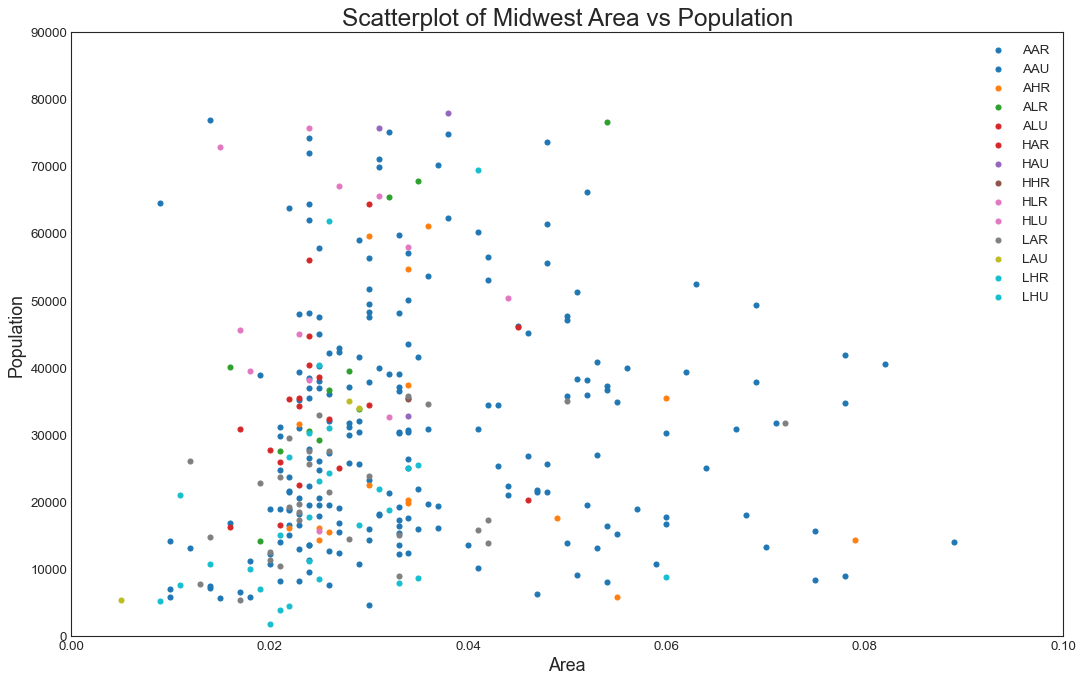

In [4]:


#Prepare Data
#Create as many as there are unique midwest['Category']

categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#Draw Plot for Each Category
plt.figure(figsize = (16,10),dpi = 80,facecolor='w',edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area','poptotal',
               data=midwest.loc[midwest.category==category,:],
               s=20,c=np.array(colors[i]).reshape(1,-1),label=str(category))

#Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)
plt.show()

Notes: `colors[i] warning,use c=np.array(colors[i]).reshape(1,-1)`

### Bubble plot with Encircling

Sometimes you want to show a group of points within a boundary to emphasize their importance. In this example, you get the records from the dataframe that should be encircled and pass it to the `encircle()` described in the code below.

For the `def encircle(x,y,an=None,**kw):`,check the question:[How do I encircle different data sets in scatter plot?](https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot)

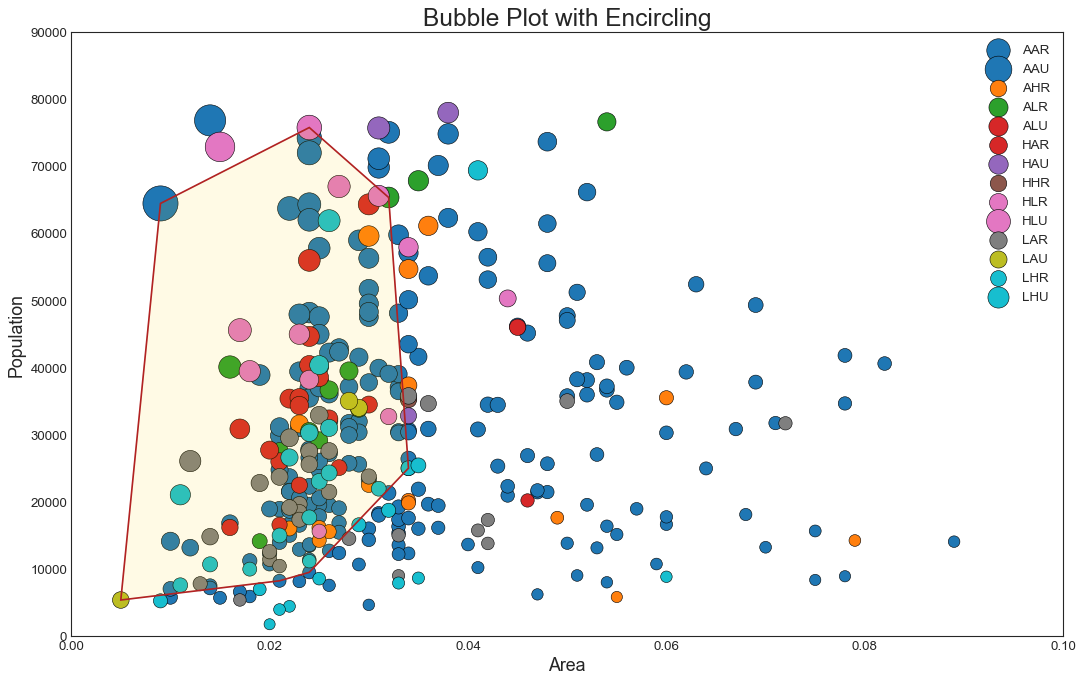

In [5]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv('../data/midwest_filter.csv')

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s='dot_size', c=np.array(colors[i]).reshape(1,-1), 
                
       ##colors[i] warning,use c=np.array(colors[i]).reshape(1,-1)
                
                label=str(category), edgecolors='black', linewidths=.5)

    
# Step 3: Encircling 

## https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

### Scatter plot with linear regression line of best fit

If you want to understand how two variables change with respect to each other, the line of best fit is the way to go.

The below plot shows how the line of best fit differs amongst various groups in the data. 

To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the `hue='cyl'` parameter from the `sns.lmplot()` call below.


In [6]:
#Import Data
df = pd.read_csv('../data/mpg.csv')
df.head(-10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
219,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact
220,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [7]:
df_select = df.loc[df.cyl.isin([4,8]), :]
df_select.head(-10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
209,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact
210,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
213,volkswagen,jetta,2.0,1999,4,manual(m5),f,21,29,r,compact


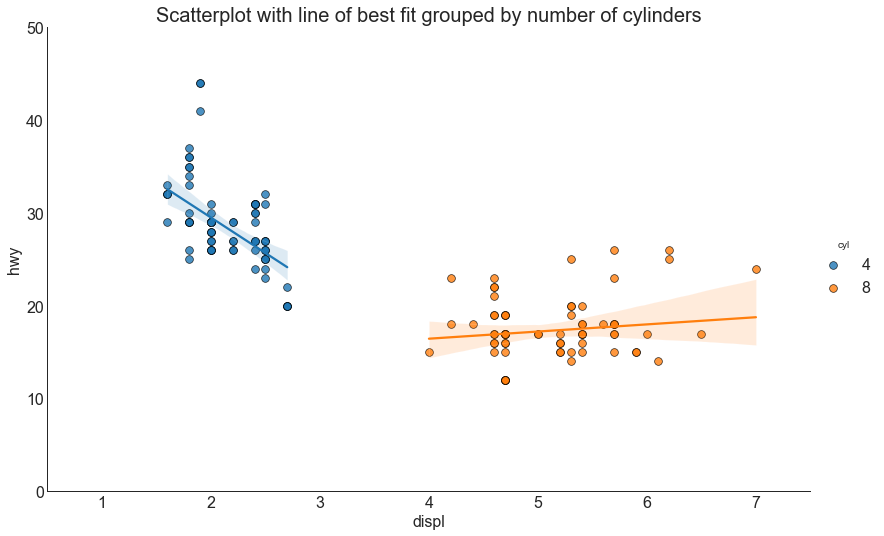

In [8]:
#Plot
sns.set_style("white")
grid_obj= sns.lmplot(x="displ",y="hwy",hue="cyl",data=df_select,
                   height=7,aspect=1.6,robust=True,palette='tab10',
                   scatter_kws=dict(s=60,linewidths=0.7,edgecolors='black'))

#Decorations
grid_obj.set(xlim=(0.5,7.5),ylim=(0.,50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders",fontsize=20)
plt.show()

#### Each regression line in its own column

Alternately, you can show the best fit line for each group in its own column. 

You can do this by setting the `col=groupingcolumn` parameter inside the `sns.lmplot()`.

In [9]:
#Import Data (mpg_ggplot2)
# df = pd.read_csv('../data/mpg.csv')
# df.head(-10)
# df_select = df.loc[df.cyl.isin([4,8]), :]
df_select.head(-10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
209,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact
210,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
213,volkswagen,jetta,2.0,1999,4,manual(m5),f,21,29,r,compact


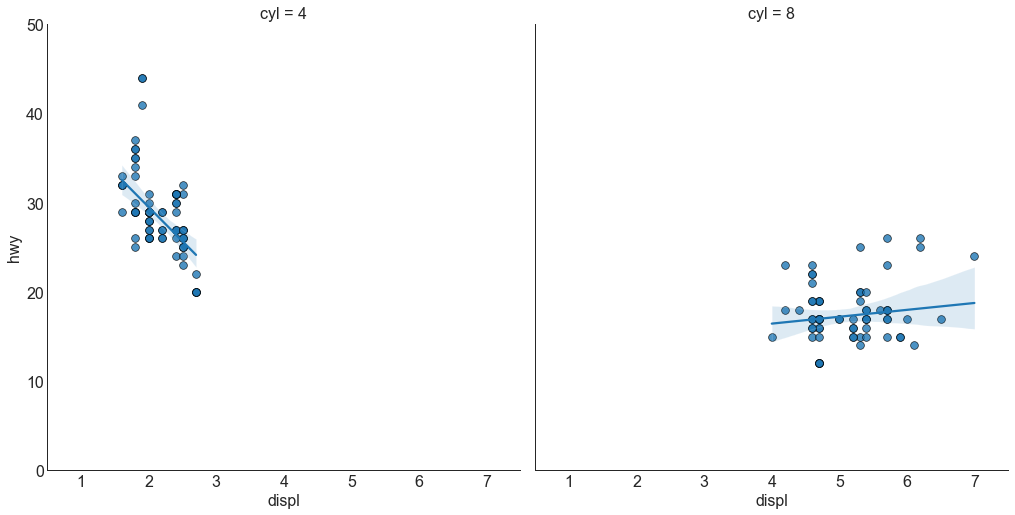

In [10]:
# Each line in its own column
sns.set_style("white")

grid_obj = sns.lmplot(x="displ",y="hwy",
                      data=df_select,
                      height=7,
                      robust=True,
                      palette='Set1',
                      col='cyl',
                      scatter_kws=dict(s=60,linewidths=0.7,edgecolors='black'))
# Decorations             
grid_obj.set(xlim=(0.5,7.5),ylim=(0,50))
plt.show()

### Jittering with stripplot

Often multiple datapoints have exactly the same X and Y values. 

As a result, multiple points get plotted over each other and hide. 

To avoid this, **jitter the points** slightly so you can visually see them. 

This is convenient to do using `seaborn’s stripplot()`.

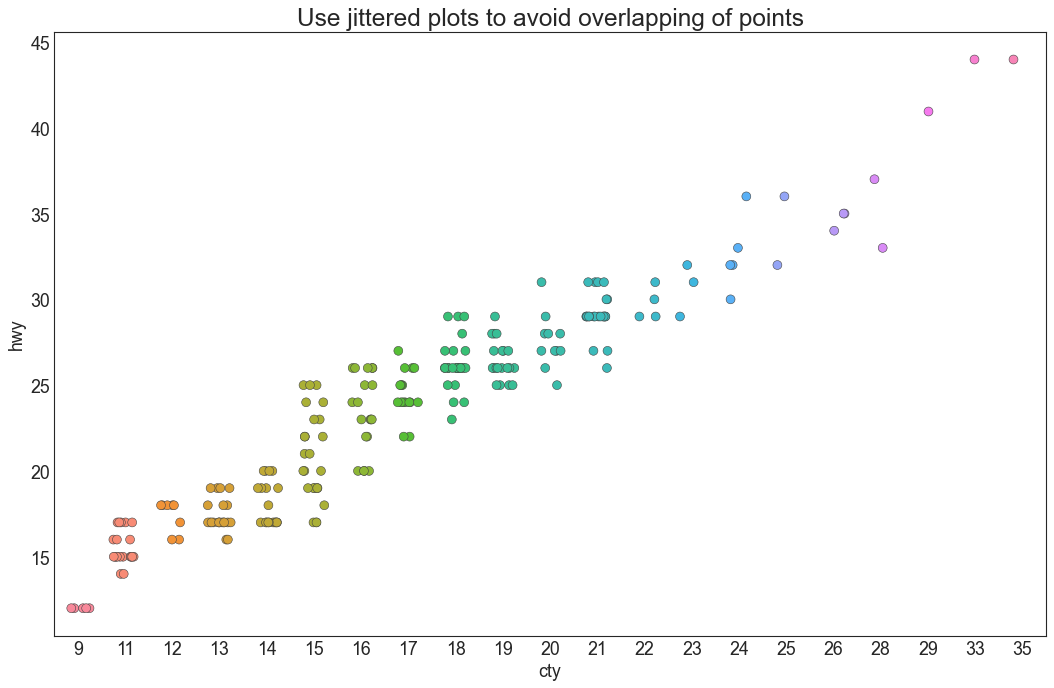

In [11]:
#Import data
# df.head()

#Draw Stripplot
_, ax = plt.subplots(figsize=(16,10),dpi=80)
sns.stripplot(df.cty,df.hwy,
              jitter=0.25,size=8,
             ax=ax,linewidth=0.5)

#Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

### Count Plot

Another option to avoid the problem of points overlap is:

    the increase the size of the dot depending on how many points lie in that spot. 
    
 
So, larger the size of the point more is the concentration of points around that.

In [12]:
#Import data mpg
# df.head()
# Prepare the data, filter the data we want:'hwy','cty'
df_counts = df.groupby(['hwy','cty']).size().reset_index(name='counts')
df_counts.head()

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2


In [13]:
# df_counts.cty

In [14]:
# df_counts.hwy

In [15]:
# df_counts.counts

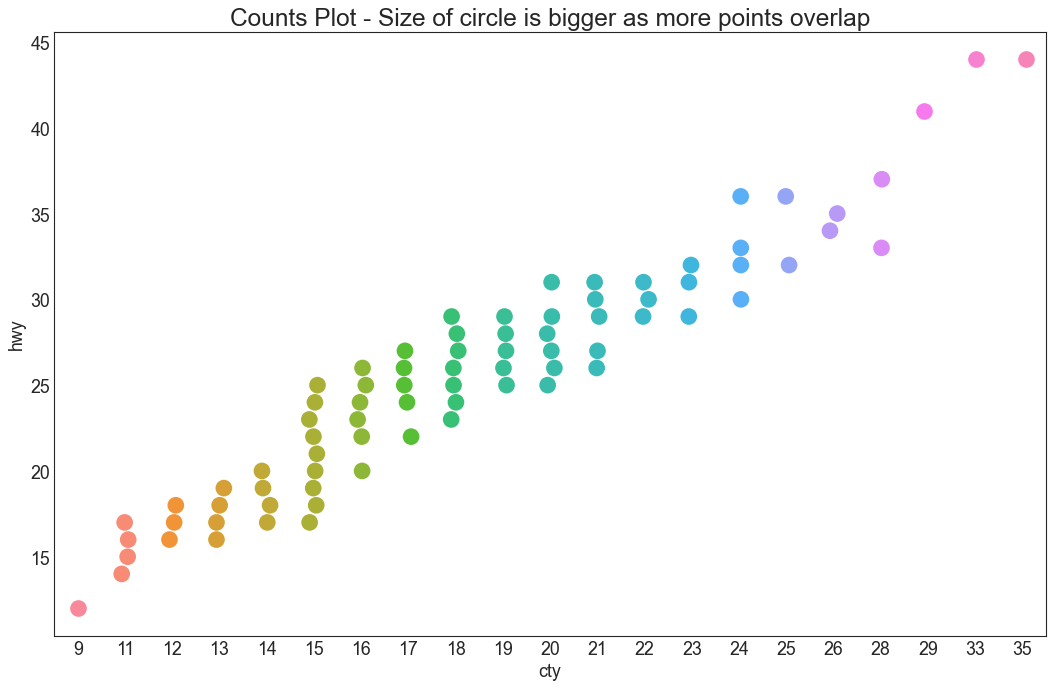

In [16]:
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy,
              size=df_counts.counts*2,
              ax=ax, s=15)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

##### ?help: where is the bigger and smaller circles?

this is the orignal plot:


<img src=https://www.machinelearningplus.com/wp-content/uploads/2018/11/5_Counts_plot_Matplotlib-min.png>

$\mathit{So\ what\ should\ I\ do,\ Ellie?~~~~~~~~~~~~(Up,2009)}$

In [17]:
# # Import Data
# df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
# df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# # Draw Stripplot
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
# sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# # Decorations
# plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
# plt.show()

### Marginal Histogram

Marginal histograms have a histogram along the X and Y axis variables. 

This is used to visualize the relationship between the X and Y along with the univariate distribution of the X and the Y individually. 

This plot if often used in `exploratory data analysis (EDA)`.


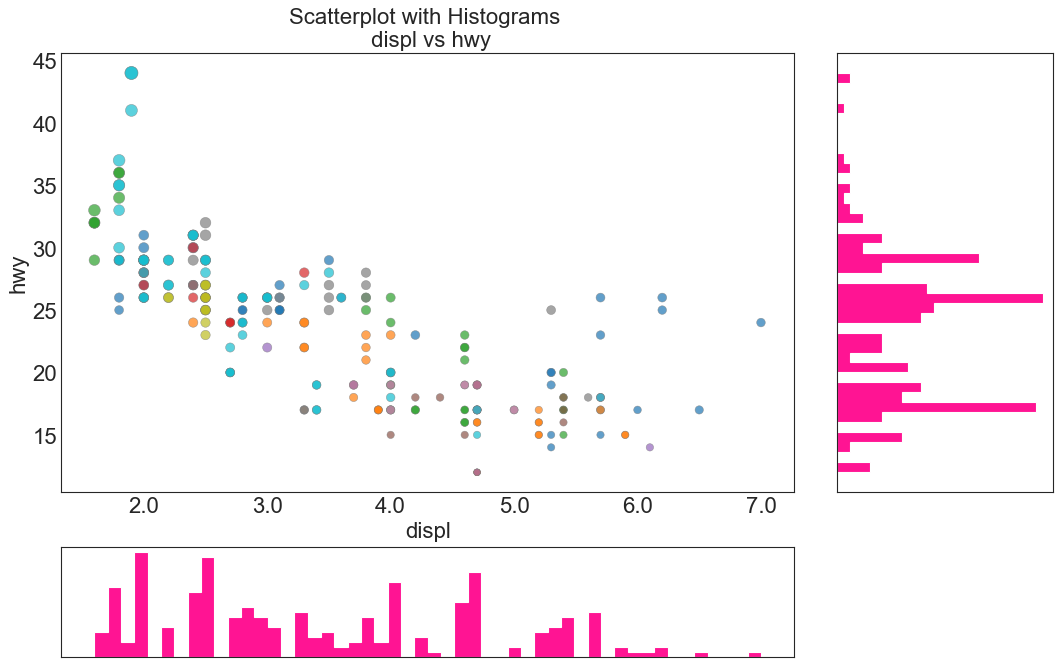

In [18]:
#Import Data
# df.head()

#Create Fig and gridspec
fig = plt.figure(figsize=(16,10),dpi=80)
grid = plt.GridSpec(4,4,hspace=0.5,wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy',
                s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, 
                alpha=.7, data=df, cmap="tab10", 
                edgecolors='gray', linewidths=.5)

# Histogram on the right
ax_bottom.hist(df.displ, 50, histtype='stepfilled',
               orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

#Histogram in the bottom
ax_right.hist(df.hwy,40,histtype='stepfilled',
              orientation='horizontal',color='deeppink')
ax_bottom.invert_yaxis()

#Decorations

ax_main.set(title='Scatterplot with Histograms \n displ vs hwy',
            xlabel='displ',ylabel='hwy')
ax_main.title.set_fontsize(20)

for item in ([ax_main.xaxis.label,ax_main.yaxis.label]
             +ax_main.get_xticklabels()+ax_main.get_yticklabels()):
    item.set_fontsize(20)
    
xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()


### Marginal Boxplot

Marginal boxplot serves a similar purpose as marginal histogram. 

However, the boxplot helps to pinpoint the median, 25th and 75th percentiles of the X and the Y.

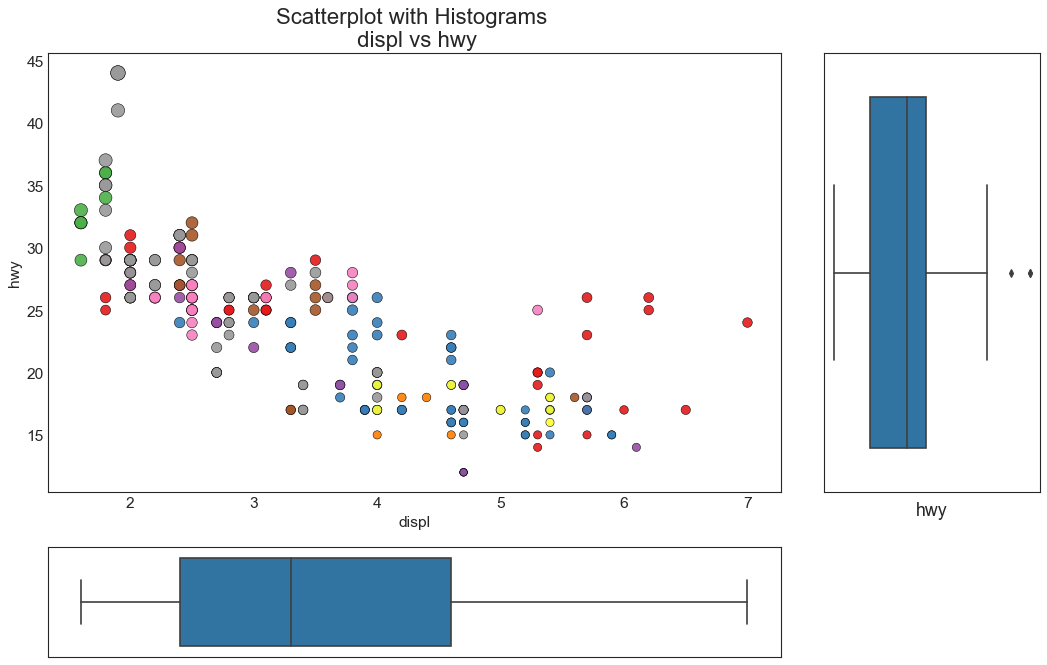

In [19]:
# Import Data:mpg_ggplot2.csv
# df.head()

#Create Fig and Gridspec
fig = plt.figure(figsize=(16,10),dpi=80)
grid = plt.GridSpec(4,4,hspace=0.5,wspace=0.2)

# Define the axes
ax_main =fig.add_subplot(grid[:-1,:-1])
ax_right =fig.add_subplot(grid[:-1,-1],xticklabels=[],yticklabels=[])
ax_bottom =fig.add_subplot(grid[-1,0:-1],xticklabels=[],yticklabels=[])

# Scatterplot on the main ax
ax_main.scatter('displ','hwy',
               s=df.cty*5,c=df.manufacturer.astype('category').cat.codes,
               alpha=0.9,data=df,cmap="Set1",edgecolors='black',linewidths=0.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="v")

# Decorations
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title,Xlabel and Ylabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy',
           xlabel='displ',ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label,ax_main.yaxis.label]
            +ax_main.get_xticklabels()+ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

### Correllogram

Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe (or 2D array).

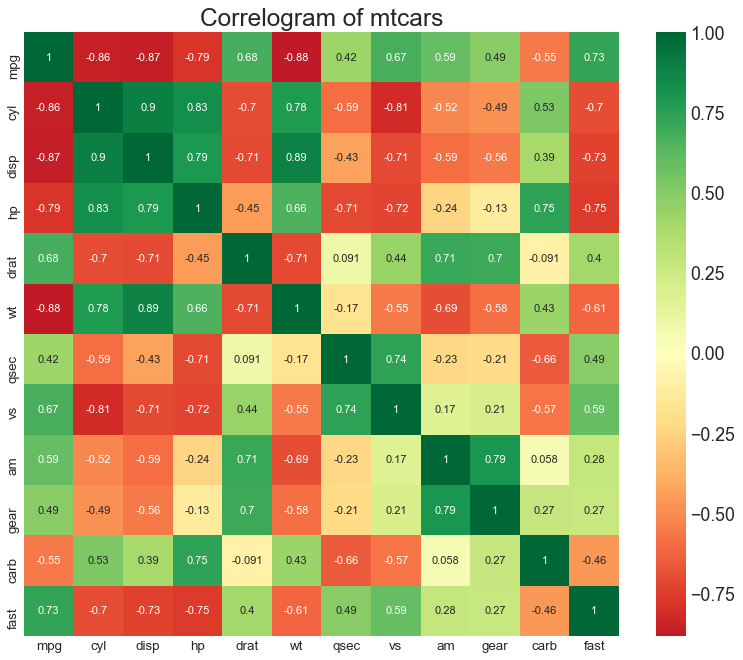

In [20]:
# Correlogram of mtcars
# Import data mpg
df = pd.read_csv('../data/mtcars.csv')
# df.head()

# Plot
plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(df.corr(),xticklabels=df.corr().columns,
            yticklabels=df.corr().columns,cmap="RdYlGn",
            center=0,annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Pairwise Plot

Pairwise plot is a favorite in exploratory analysis to understand the relationship between all possible pairs of numeric variables.

It is a **must have tool for bivariate analysis**.

<Figure size 800x640 with 0 Axes>

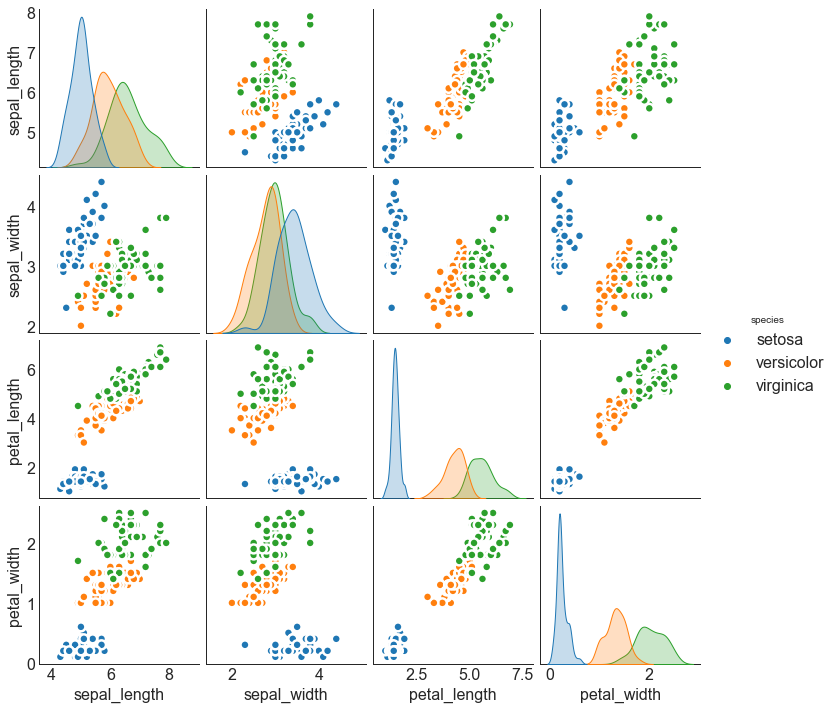

In [65]:
# Load dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8),dpi=80)
sns.pairplot(df, kind="scatter", hue="species", 
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

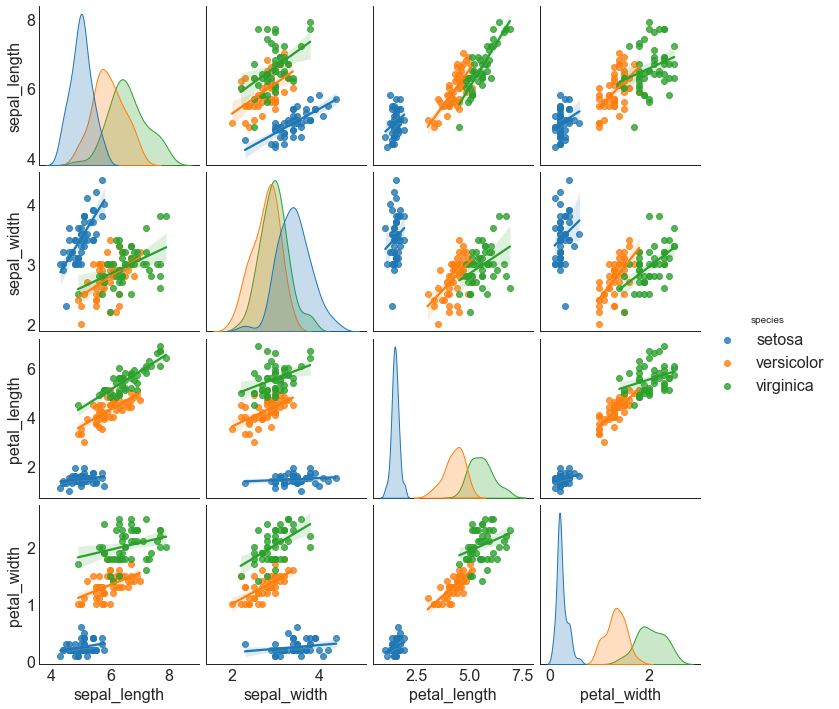

In [66]:
plt.figure(figsize=(10,8),dpi=80)
sns.pairplot(df,kind='reg',hue='species')
plt.show()

Deviation
### Diverging Bars

If you want to see how the items are varying based on a single metric and visualize the order and amount of this variance, the diverging bars is a great tool. 

It helps to quickly differentiate the performance of groups in your data and is quite intuitive and instantly conveys the point.

In [31]:
# Prepare Data mtcars
df = pd.read_csv('../data/mtcars.csv')
# df.head()
x = df.loc[:, ['mpg']]
# x.head()
df['mpg_z'] = (x - x.mean())/x.std()

# classify
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z',inplace=True)

df.reset_index(inplace=True)
df.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


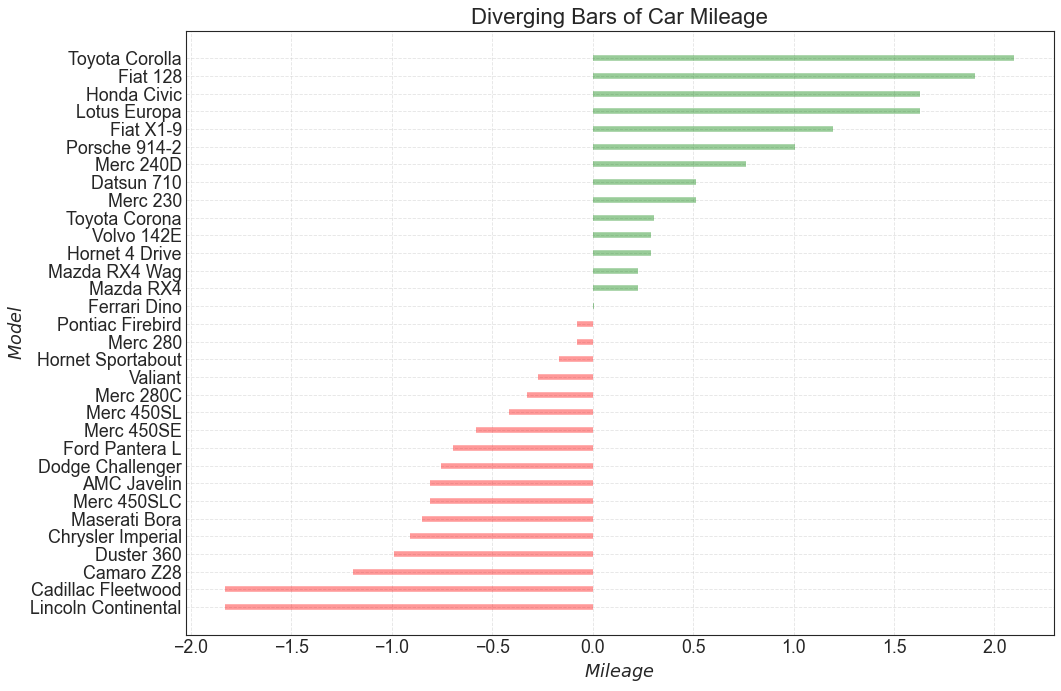

In [32]:
# Draw plot
plt.figure(figsize=(14,10),dpi=80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z,colors=df.colors,
          alpha=0.4,linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$',xlabel='$Mileage$')
plt.yticks(df.index,df.cars,fontsize=16)
plt.title('Diverging Bars of Car Mileage',fontdict={'size':20})
plt.grid(linestyle='--',alpha=0.5)
# plt.show()

### Diverging Texts

Diverging texts is similar to diverging bars and it preferred if you want to show the value of each items within the chart in a nice and presentable way.

(-2.5, 2.5)

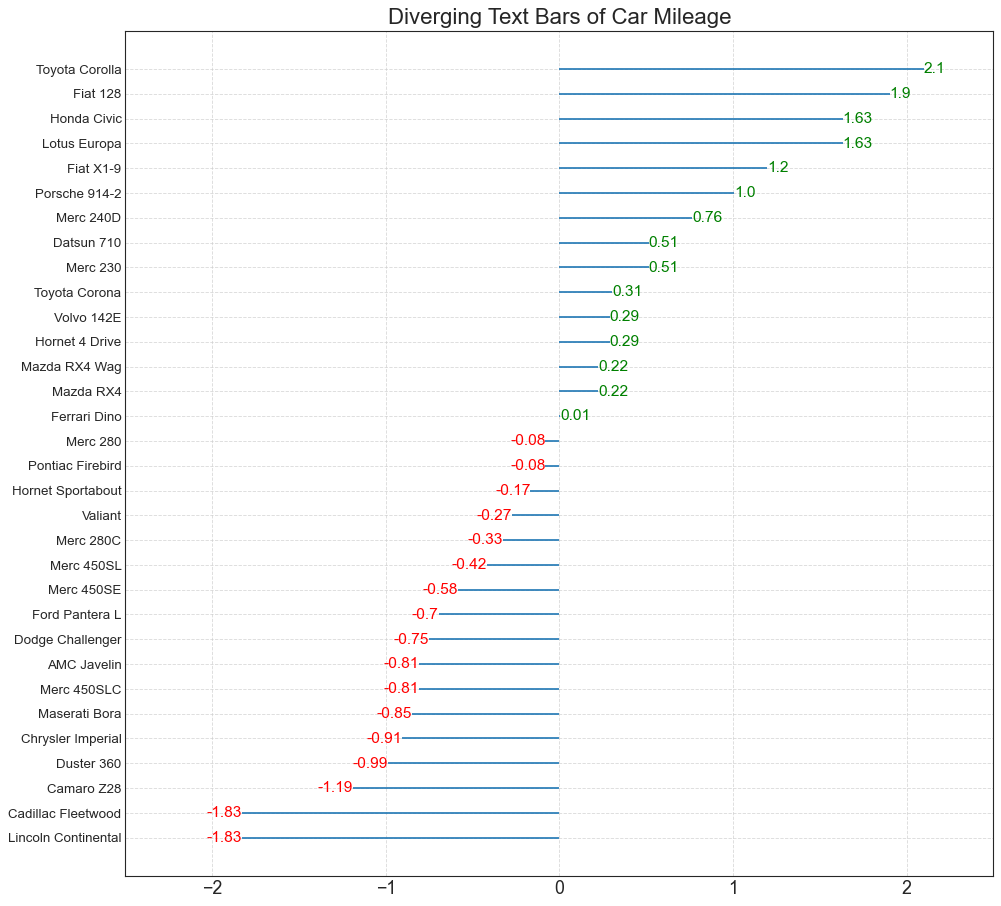

In [33]:
# Prepare data mtcars
# df.head()
x = df.loc[:,['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()

df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]

df.sort_values('mpg_z',inplace=True)
df.reset_index(inplace=True)

# Draw Plot
plt.figure(figsize=(14,14),dpi=80)
plt.hlines(y=df.index, xmin=0,xmax=df.mpg_z)

for x,y,tex in zip(df.mpg_z,df.index,df.mpg_z):
    t = plt.text(x,y,round(tex,2),
                 horizontalalignment='right' if x <0 else 'left',
                 verticalalignment='center',
                 fontdict={'color':'red' if x <0 else 'green','size':14})
    
# Decorations
plt.yticks(df.index, df.cars,fontsize=12)
plt.title('Diverging Text Bars of Car Mileage',fontdict={'size':20})
plt.grid(linestyle='--',alpha=0.7)
plt.xlim(-2.5,2.5)
# plt.show()

### Diverging Dot Plot

Divering dot plot is also similar to the diverging bars.

However compared to diverging bars, the absence of bars reduces the amount of contrast and disparity between the groups.

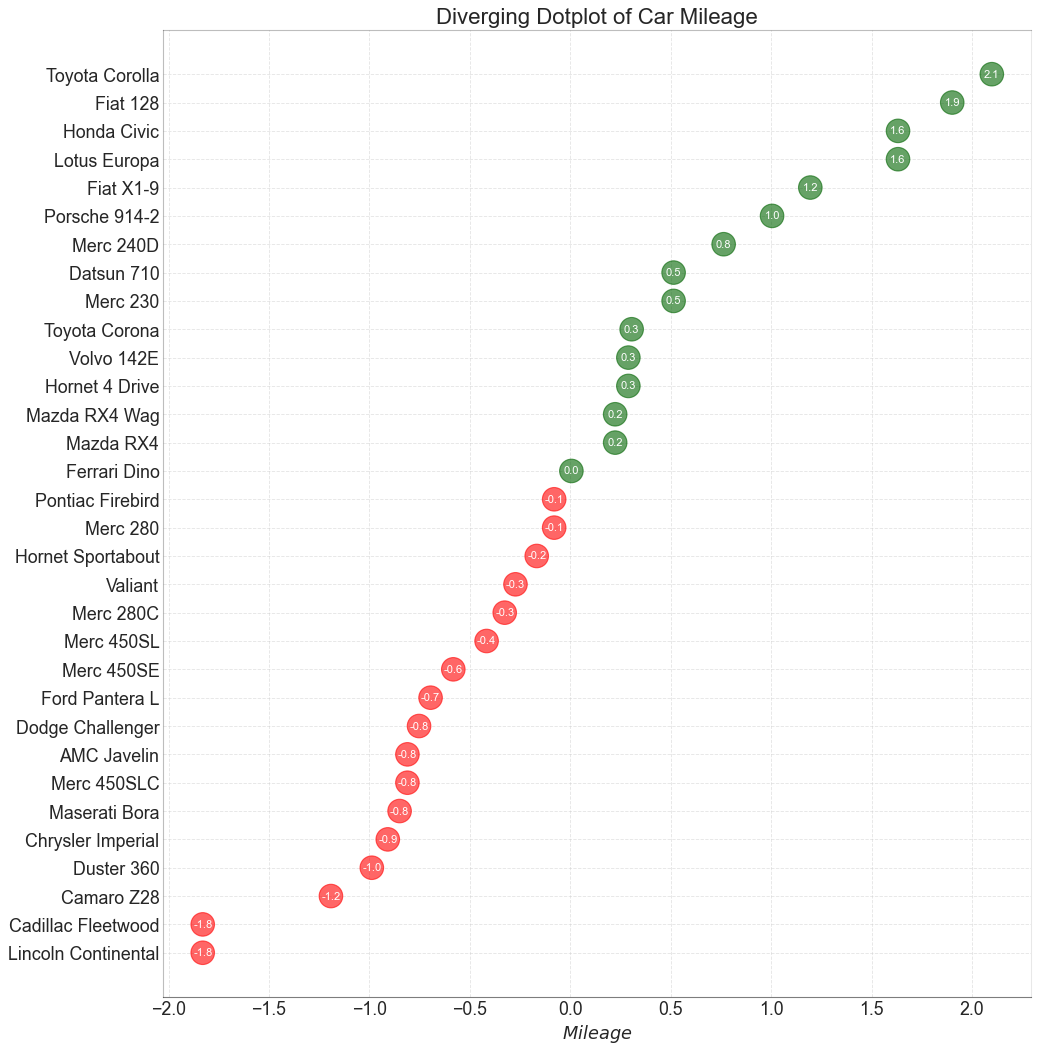

In [39]:
# Prepare Data mtcars
df = pd.read_csv('../data/mtcars.csv')
# df.head()
x = df.loc[:, ['mpg']]

df['mpg_z'] = (x-x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z',inplace=True)
df.reset_index(inplace=True)

# Draw Plot
plt.figure(figsize=(14,16),dpi=80)
plt.scatter(df.mpg_z,df.index,s=450,alpha=0.6,color=df.colors)

for x,y,tex in zip(df.mpg_z,df.index,df.mpg_z):
    t = plt.text(x,y,round(tex,1),horizontalalignment= 'center',
                verticalalignment = 'center',fontdict={'color':'white'})
# you can run the code here.

# Decorations
# lighten borders

ax = plt.gca()
ax.spines["top"].set_alpha(0.3)
ax.spines["bottom"].set_alpha(0.6)
ax.spines["right"].set_alpha(0.1)
ax.spines["left"].set_alpha(0.3)

plt.yticks(df.index,df.cars)
plt.title('Diverging Dotplot of Car Mileage',fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--',alpha=0.5)
plt.xlim=(-2.5,2.5)
plt.show()

### Diverging Lollipop Chart with Markers

Lollipop with markers provides a flexible way of visualizing the divergence by laying emphasis on any significant datapoints you want to bring attention to and give reasoning within the chart appropriately.

In [55]:
df.head()

,level_0,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,black
1,1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,black
2,2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,black
3,3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,black
4,4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,black


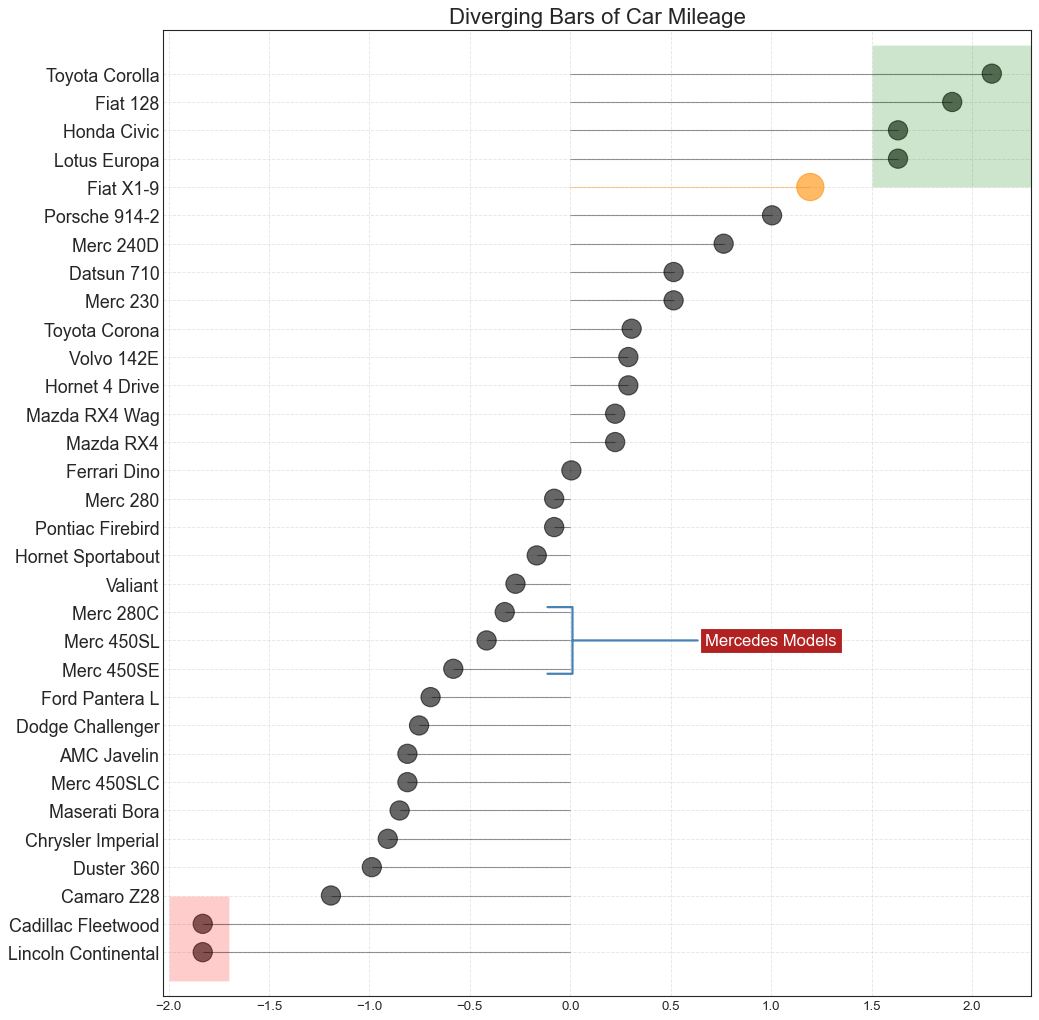

In [64]:
# Prepare Data mtcars
# df.head()
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
# df.reset_index(inplace=True)


# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(14,16), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models',xy=(0.0,11.0),xytext=(1.0,11),xycoords='data',
             fontsize=15,ha='center',va='center',
             bbox=dict(boxstyle='square',fc='firebrick'),
             arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5',
                             lw=2.0,color='steelblue'),color='white')


# Add Patches
p1 = patches.Rectangle((-2.0,-1),width=0.3,height=3,alpha=0.2,facecolor='red')
p2 = patches.Rectangle((1.5,27),width=0.8,height=5,alpha=0.2,facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decoration
plt.title('Diverging Bars of Car Mileage',fontdict={'size':20})
plt.grid(linestyle='--',alpha=0.5)

### Area Chart

By coloring the area between the axis and the lines, the area chart throws more emphasis not just on the peaks and troughs but also the duration of the highs and lows. The longer the duration of the highs, the larger is the area under the line.

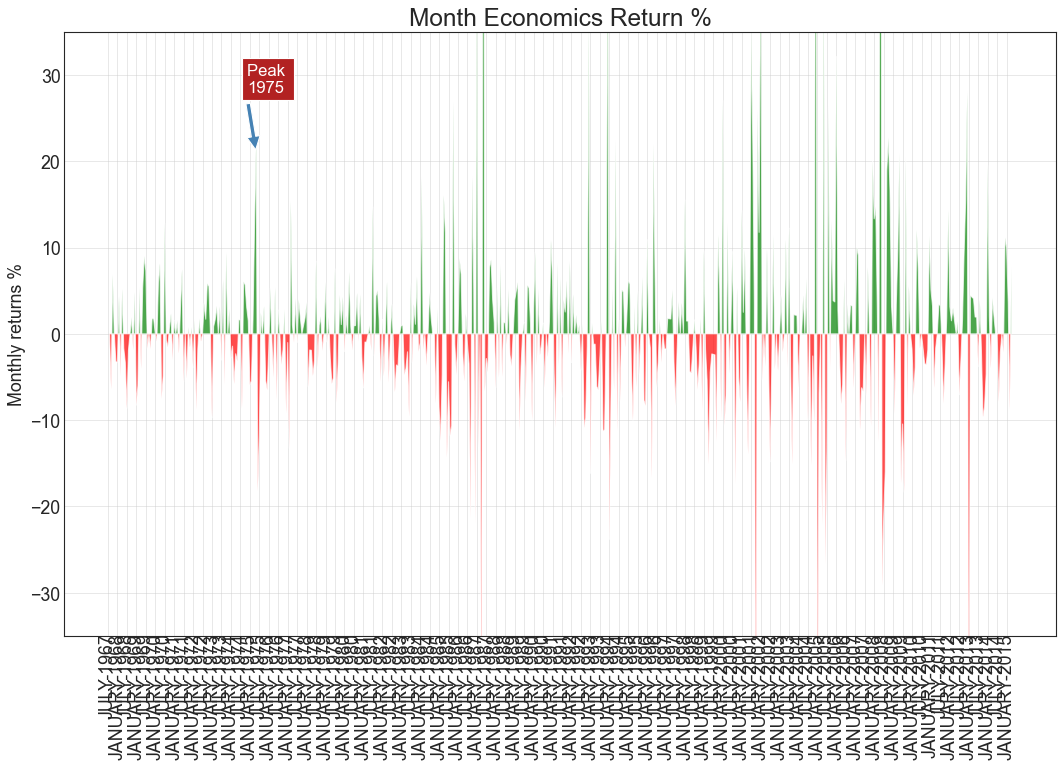

In [124]:
# Prepare Data and np pd
df = pd.read_csv('../data/economics.csv')
# df.head()

x = np.arange(df.shape[0])  # 创造一个和数据相同长度的序列
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100
# y_returns 获取所需要的数据


# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')

# Date transfer
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()


# Decorations
xtickvals = [str(m).upper()+"-"+str(y) for y,m in zip(df.year,df.month)]

plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90,
                          fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

plt.ylim(-35,35)
# plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)